<a href="https://colab.research.google.com/github/soyab266/machine-learning/blob/main/xaviour_and_he_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
import keras
#from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

In [4]:
df=pd.read_csv('/content/1.ushape.csv')

In [5]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [6]:
df.columns

Index(['3.159499363321345566e-02', '9.869877579082642072e-01',
       '0.000000000000000000e+00'],
      dtype='object')

In [8]:
df.rename(columns={'0.000000000000000000e+00' : 'class','3.159499363321345566e-02':'x','9.869877579082642072e-01' 	:'y'},inplace=True)

In [9]:
df.head()

,x,y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


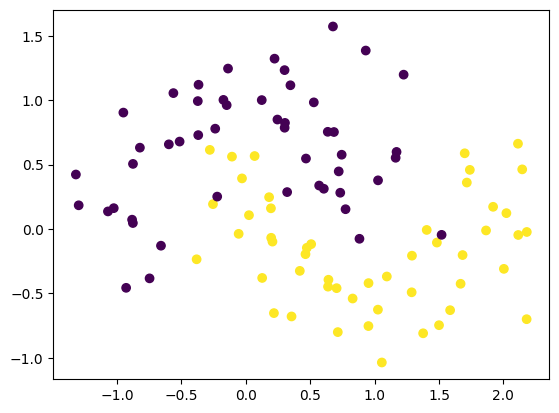

In [11]:
plt.scatter(x=df['x'], y=df['y'],c=df['class'])

In [42]:
X=df.iloc[:,0:2].values

In [43]:
Y=df.iloc[:,-1].values

In [44]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_dim=2))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                30        
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 481 (1.88 KB)
Trainable params: 481 (1.8

In [45]:
initial_weights=model.get_weights()

In [46]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [48]:
model.compile( optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [49]:
history=model.fit(X,Y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 2s 126ms/step - loss: 0.6981 - accuracy: 0.4810 - val_loss: 0.6835 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 29ms/step - loss: 0.6740 - accuracy: 0.6456 - val_loss: 0.6506 - val_accuracy: 0.9000
Epoch 3/100
3/3 [==============================] - 0s 28ms/step - loss: 0.6525 - accuracy: 0.8354 - val_loss: 0.6210 - val_accuracy: 0.8500
Epoch 4/100
3/3 [==============================] - 0s 20ms/step - loss: 0.6346 - accuracy: 0.7468 - val_loss: 0.5926 - val_accuracy: 0.8500
Epoch 5/100
3/3 [==============================] - 0s 31ms/step - loss: 0.6198 - accuracy: 0.7342 - val_loss: 0.5664 - val_accuracy: 0.8500
Epoch 6/100
3/3 [==============================] - 0s 32ms/step - loss: 0.6017 - accuracy: 0.7215 - val_loss: 0.5448 - val_accuracy: 0.8500
Epoch 7/100
3/3 [==============================] - 0s 28ms/step - loss: 0.5863 - accuracy: 0.7342 - val_loss: 0.5251 - val_accuracy: 0.8500
Epoch 8/100
3/3 [==

9600/9600 [==============================] - 18s 2ms/step


<Axes: >

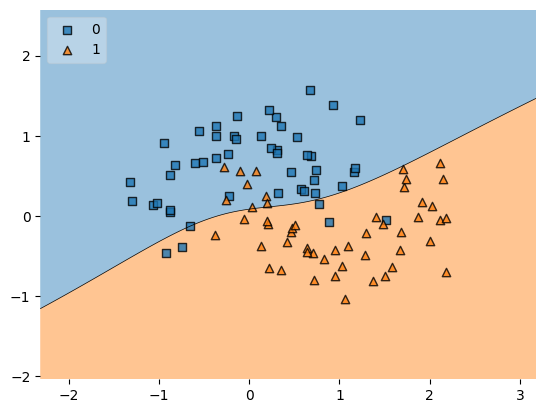

In [50]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,Y.astype('int'), clf=model, legend=2)

In [57]:
model=Sequential()
model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 10)                30        
                                                                 
 dense_25 (Dense)            (None, 10)                110       
                                                                 
 dense_26 (Dense)            (None, 10)                110       
                                                                 
 dense_27 (Dense)            (None, 10)                110       
                                                                 
 dense_28 (Dense)            (None, 1)                 11        
                                                                 
Total params: 371 (1.45 KB)
Trainable params: 371 (1.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
model.get_weights()

[array([[ 0.5868641 , -0.2090249 , -0.20793879, -0.52250046,  0.47138113,
         -0.7353443 , -0.30948162, -0.9943951 ,  0.70763606,  0.34368184],
        [-0.7865687 ,  0.02380779,  0.4942345 ,  1.805851  , -0.43796578,
          0.8674838 ,  0.4373753 , -1.4298275 , -0.9802409 , -0.8361816 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.5779744 , -0.7138373 ,  0.0331639 , -0.16956535, -0.0851312 ,
         -0.94739664, -0.27534413, -0.9218426 , -0.11323523,  0.4555693 ],
        [ 0.5661242 ,  0.36097404,  0.35484967,  0.1130072 ,  0.36029968,
         -0.27492034, -0.6143354 ,  0.6250298 ,  0.42174333,  0.20844308],
        [-0.5717086 , -0.28970322, -0.04865211,  0.01268375,  0.16398017,
          0.5216881 ,  0.13055113, -0.22513436,  0.17269596,  0.5470152 ],
        [ 0.9167975 ,  0.04869384,  0.26303363, -0.19583423, -0.18034239,
         -0.17485008, -0.09068768,  0.22353715, -0.25719124, -0.20662527],
        [ 0.05544

In [59]:
model.compile( loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [62]:
history=model.fit(X,Y,epochs=50,validation_split=0.3)

Epoch 1/50
3/3 [==============================] - 2s 111ms/step - loss: 0.7076 - accuracy: 0.5072 - val_loss: 0.6860 - val_accuracy: 0.4667
Epoch 2/50
3/3 [==============================] - 0s 19ms/step - loss: 0.7006 - accuracy: 0.5072 - val_loss: 0.6784 - val_accuracy: 0.4333
Epoch 3/50
3/3 [==============================] - 0s 29ms/step - loss: 0.6946 - accuracy: 0.5072 - val_loss: 0.6712 - val_accuracy: 0.4667
Epoch 4/50
3/3 [==============================] - 0s 21ms/step - loss: 0.6886 - accuracy: 0.5072 - val_loss: 0.6636 - val_accuracy: 0.4667
Epoch 5/50
3/3 [==============================] - 0s 31ms/step - loss: 0.6827 - accuracy: 0.5072 - val_loss: 0.6555 - val_accuracy: 0.5000
Epoch 6/50
3/3 [==============================] - 0s 30ms/step - loss: 0.6765 - accuracy: 0.4928 - val_loss: 0.6476 - val_accuracy: 0.5000
Epoch 7/50
3/3 [==============================] - 0s 20ms/step - loss: 0.6703 - accuracy: 0.5362 - val_loss: 0.6404 - val_accuracy: 0.5000
Epoch 8/50
3/3 [==========

9600/9600 [==============================] - 21s 2ms/step


<Axes: >

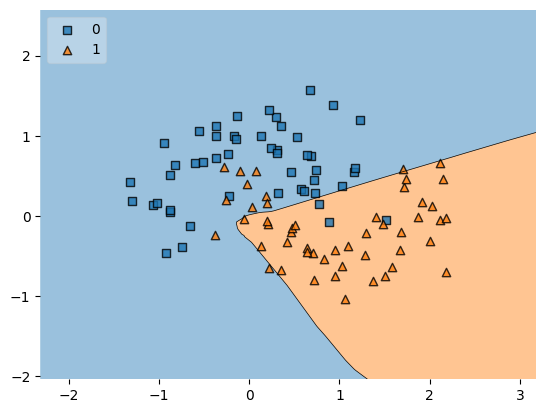

In [65]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,Y.astype('int'), clf=model, legend=2)